In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./matches.csv',index_col=0)

df_initial = df
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [3]:
df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [4]:
# the data set contains only teams which plain premier league.
df['comp'].unique()

array(['Premier League'], dtype=object)

In [5]:
#these are the unique teams present in the dataset.
df['team'].unique()

array(['Manchester City', 'Chelsea', 'Arsenal', 'Tottenham Hotspur',
       'Manchester United', 'West Ham United', 'Wolverhampton Wanderers',
       'Newcastle United', 'Leicester City', 'Brighton and Hove Albion',
       'Brentford', 'Southampton', 'Crystal Palace', 'Aston Villa',
       'Leeds United', 'Burnley', 'Everton', 'Watford', 'Norwich City',
       'Liverpool', 'Fulham', 'West Bromwich Albion', 'Sheffield United'],
      dtype=object)

In [6]:
#the no.of unique teams are 23 as there are 2 seasons data where 3 teams get relegated in each season.
df['team'].unique().size

23

In [7]:
#datatypes of the values present in the dataset , we need to covert every column to a numerical representation.
df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [8]:
#converting time to date time type.
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))
df['date'].dtype

dtype('<M8[ns]')

In [9]:
#creating match kickoff hours and minutes column from time and coverting it into int.
df['kf_hrs'] = df['time'].apply(lambda x: int(x.split(':')[0]))
df['kf_mins'] = df['time'].apply(lambda x: int(x.split(':')[1]))
df['kf_hrs'].dtype , df['kf_mins'].dtype

(dtype('int64'), dtype('int64'))

In [10]:
df['matchweek'] = df['round'].apply(lambda x:int(x.split(" ")[1]))
df['matchweek'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 30, 34, 33,
       35, 36, 37, 38], dtype=int64)

In [11]:
df.isnull().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
kf_hrs             0
kf_mins            0
matchweek          0
dtype: int64

In [12]:
#we can remove notes  and match report
df = df.drop(['notes'],axis=1)
df=df.drop(['match report'],axis=1)

In [13]:
#filling NaN value of dist with 0.
df[df['dist'].isna()]
df['dist'] = df['dist'].fillna(0)

In [14]:
df.isnull().sum()

date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance    696
captain         0
formation       0
referee         0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
kf_hrs          0
kf_mins         0
matchweek       0
dtype: int64

In [15]:
#fill na values with the mean attendance of the team.
attendance_NantemaList = df['team'].unique()
mean_dict = {}
for i in attendance_NantemaList:
    temp_List=[]
    temp_List=  df[df['team']==i]['attendance']
    mean_dict.update({i:temp_List.mean()})

In [16]:
attendance_arr_final = []
for i in attendance_NantemaList:
    attendance_arr_final.extend(df[df['team']==i]['attendance'].fillna(mean_dict[i]))


df['attendance'] = attendance_arr_final

In [17]:
df.isnull().sum()

date          0
time          0
comp          0
round         0
day           0
venue         0
result        0
gf            0
ga            0
opponent      0
xg            0
xga           0
poss          0
attendance    0
captain       0
formation     0
referee       0
sh            0
sot           0
dist          0
fk            0
pk            0
pkatt         0
season        0
team          0
kf_hrs        0
kf_mins       0
matchweek     0
dtype: int64

In [18]:
df.dtypes

date          datetime64[ns]
time                  object
comp                  object
round                 object
day                   object
venue                 object
result                object
gf                   float64
ga                   float64
opponent              object
xg                   float64
xga                  float64
poss                 float64
attendance           float64
captain               object
formation             object
referee               object
sh                   float64
sot                  float64
dist                 float64
fk                   float64
pk                   float64
pkatt                float64
season                 int64
team                  object
kf_hrs                 int64
kf_mins                int64
matchweek              int64
dtype: object

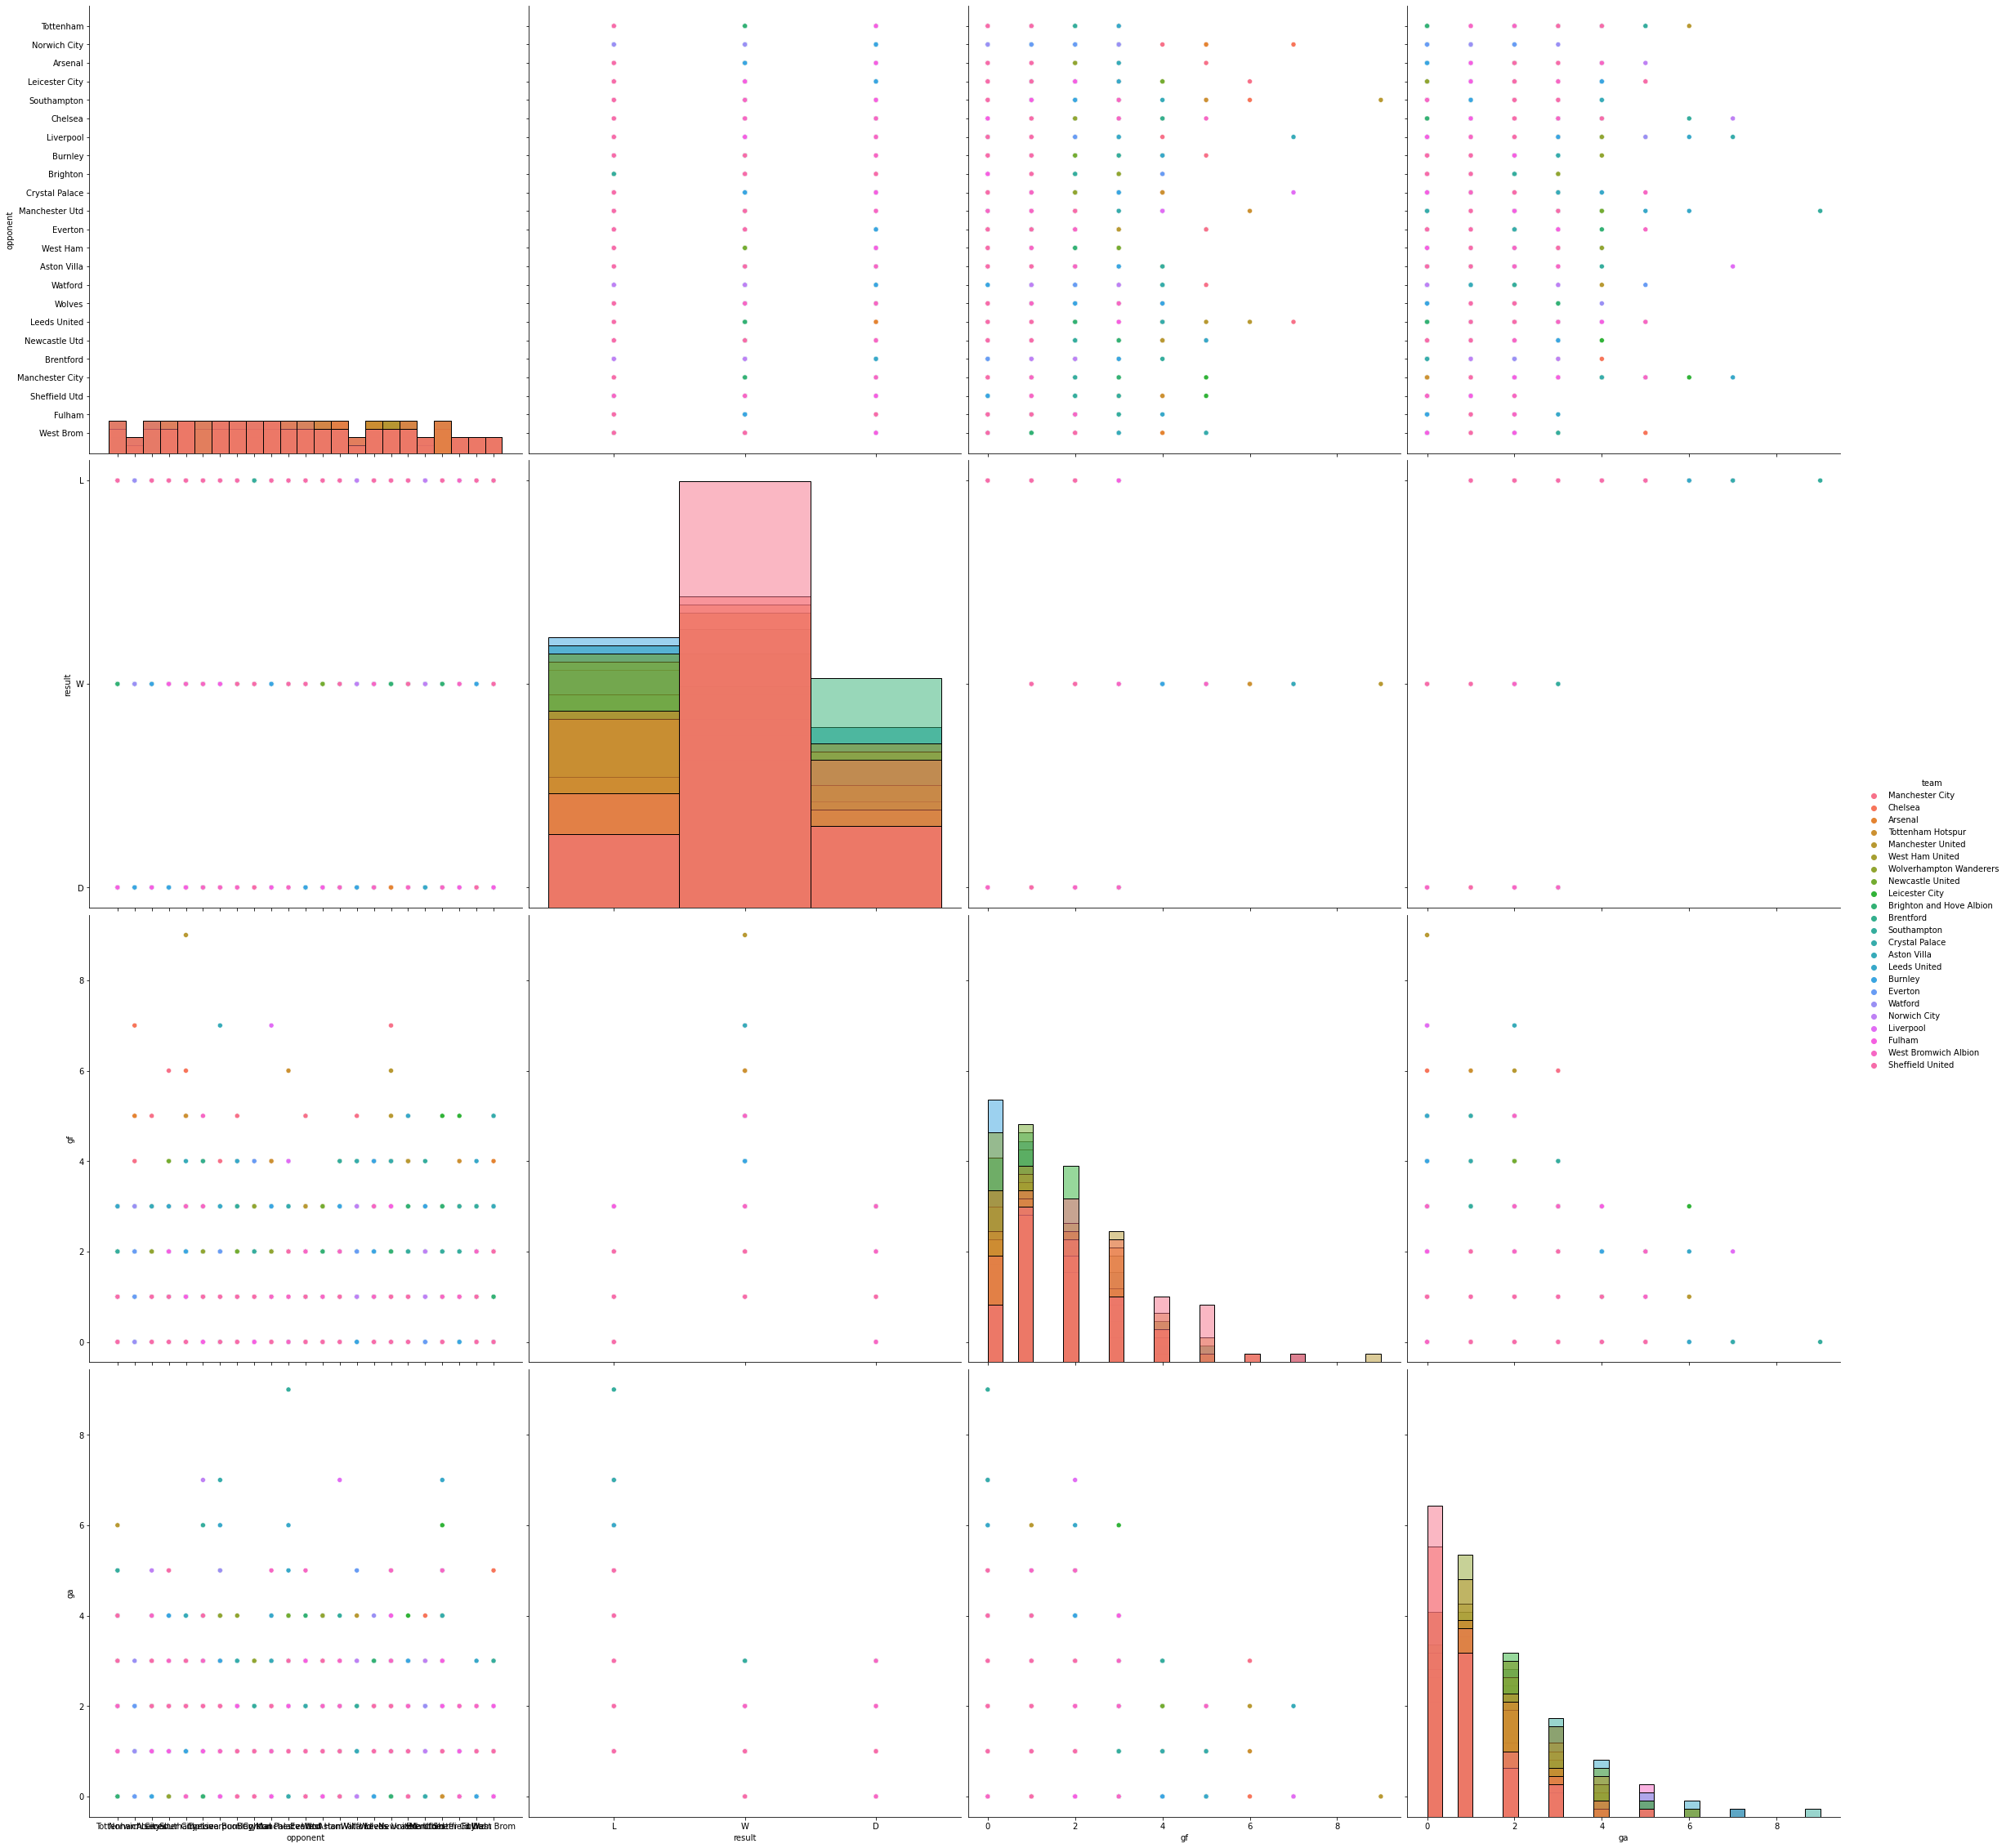

In [19]:
sns.pairplot(df,vars=['opponent','result','gf','ga'],height=8,diag_kind='hist',hue='team')

In [20]:
#storing the data of past 3 matchs average.
df_temp = pd.DataFrame()
team_groups = df.groupby('team')
colmn = ['gf','ga','sh','sot','dist','fk','pk','pkatt','poss','attendance']
new_colmn = [f"rolling_{i}" for i in colmn]
teamnames= df['team'].unique()
def three_match_avg(group , colmn,new_colmn):
    group = group.sort_values('date')
    threemathcesavg = group[colmn].rolling(3,closed='left').mean()
    group[new_colmn] = threemathcesavg
    group = group.dropna(subset=new_colmn)
    return group

for i in teamnames:
    grouped_each =  team_groups.get_group(i)
    indivi_grp = three_match_avg(grouped_each,colmn,new_colmn)
    df_temp= pd.concat([df_temp,indivi_grp],)

df = df_temp

In [21]:
df['result']

5     W
7     D
9     W
11    D
12    L
     ..
38    L
39    L
40    W
41    L
42    W
Name: result, Length: 1320, dtype: object

In [22]:
#lable encoding datas.
df['day_lable'] = df['day'].astype('category').cat.codes
df['venue_lable'] = df['venue'].astype('category').cat.codes
df['opponent_lable'] = df['opponent'].astype('category').cat.codes
df['formation_lable'] = df['formation'].astype('category').cat.codes
df['referee_lable'] = df['referee'].astype('category').cat.codes
df['result_lable'] = df['result'].apply(lambda x: 1 if x=='W' else 0) 

In [23]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,rolling_pk,rolling_pkatt,rolling_poss,rolling_attendance,day_lable,venue_lable,opponent_lable,formation_lable,referee_lable,result_lable
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,0.333333,0.333333,61.666667,34598.176471,2,1,0,4,3,1
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,0.000000,0.000000,59.666667,34598.176471,2,0,21,10,2,0
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,0.000000,0.000000,59.000000,34598.176471,2,0,16,10,14,1
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,0.000000,0.000000,64.333333,34598.176471,3,1,11,7,4,0
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,0.000000,0.333333,62.666667,34598.176471,2,0,18,10,16,0


<AxesSubplot:>

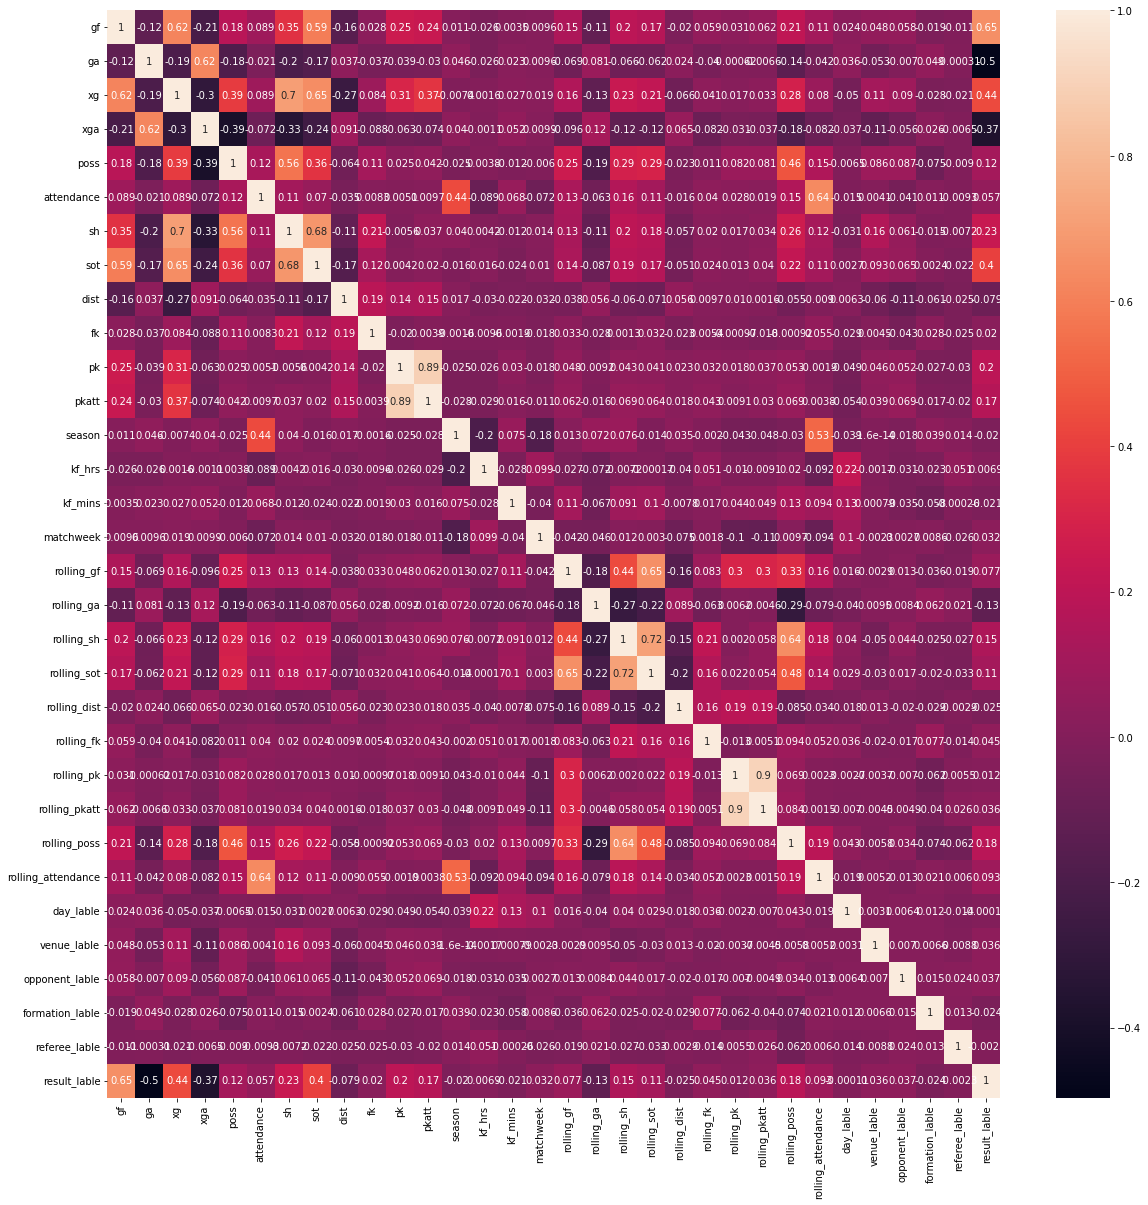

In [24]:
#feature selection
#correlation between different attributes.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


In [37]:
df1 = df.drop(['time','comp','round','day','venue','captain','formation','season','opponent','referee','team','result','gf','ga','sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt','xg','xga','attendance','poss'],axis=1)
df1

,date,kf_hrs,kf_mins,matchweek,rolling_gf,rolling_ga,rolling_sh,rolling_sot,rolling_dist,rolling_fk,rolling_pk,rolling_pkatt,rolling_poss,rolling_attendance,day_lable,venue_lable,opponent_lable,formation_lable,referee_lable,result_lable
5,2020-10-17,17,30,5,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333,61.666667,34598.176471,2,1,0,4,3,1
7,2020-10-24,12,30,6,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000,59.666667,34598.176471,2,0,21,10,2,0
9,2020-10-31,12,30,7,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000,59.000000,34598.176471,2,0,16,10,14,1
11,2020-11-08,16,30,8,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000,64.333333,34598.176471,3,1,11,7,4,0
12,2020-11-21,17,30,9,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333,62.666667,34598.176471,2,0,18,10,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19,15,34,0.333333,1.333333,7.333333,2.333333,18.466667,0.000000,0.000000,0.000000,43.000000,5666.666667,3,0,18,0,0,0
39,2021-05-08,15,0,35,0.333333,1.666667,7.666667,2.000000,18.300000,0.000000,0.000000,0.000000,39.333333,5666.666667,2,1,6,4,20,0
40,2021-05-16,19,0,36,0.333333,2.000000,7.333333,1.333333,15.200000,0.333333,0.000000,0.000000,38.666667,5666.666667,3,0,7,1,10,1
41,2021-05-19,18,0,37,0.333333,2.000000,8.333333,1.333333,15.266667,0.333333,0.000000,0.000000,40.666667,5666.666667,6,0,14,1,19,0


In [38]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df1['pld_year']  = df1['date'].dt.year
df1['pld_day']  = df1['date'].dt.day
df1['pld_month']  = df1['date'].dt.month

df1 = df1.drop(['date'],axis=1)

X_train = df1[df1['pld_year']<=2021]
y_train = df1[df1['pld_year']>2021]
X_test = df1[df1['pld_year']<=2021]['result_lable']
y_test = df1[df1['pld_year']>2021]['result_lable'] 

X_train=X_train.drop(['result_lable'],axis=1)
y_train=y_train.drop(['result_lable'],axis=1)

print(len(X_train),len(X_test),len(y_train),len(y_test))

1038 1038 282 282


In [39]:
for i in X_train.columns:
    print(i)
    print(X_train[i].unique())

kf_hrs
[17 12 16 15 20 18 19 14 13]
kf_mins
[30  0 15 45  5]
matchweek
[ 5  6  7  8  9 10 11 12 13 14 15 17 18 19  1 20 21 22 23 24 16 25 26 29
 27 33 28 30 31 32 34 35 36 37 38  2  3  4]
rolling_gf
[2.         1.33333333 1.         0.66666667 2.33333333 2.66666667
 3.66666667 3.         3.33333333 1.66666667 4.         5.66666667
 0.33333333 0.         4.33333333]
rolling_ga
[2.33333333 2.         0.66666667 0.33333333 1.         0.
 1.33333333 1.66666667 2.66666667 3.         3.66666667 3.33333333
 4.33333333 4.66666667 4.        ]
rolling_sh
[17.33333333 16.66666667 14.33333333 12.         15.33333333 18.33333333
 16.         13.33333333 14.66666667 19.33333333 13.66666667 10.
 11.33333333 12.33333333 15.         18.         20.33333333 15.66666667
 20.66666667 12.66666667 19.66666667 22.         18.66666667 17.
 17.66666667 26.66666667 24.         21.33333333 11.         10.66666667
 14.         13.         21.66666667  7.66666667  5.33333333  7.
  9.66666667 10.33333333  9.3333333

In [49]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train = X_train.assign(**{col:X_train_scaled[:,i] for i, col in enumerate(X_train.columns)})


scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_train = y_train.assign(**{col:y_train_scaled[:,i] for i, col in enumerate(y_train.columns)})
    

In [50]:
model = RandomForestClassifier(n_estimators=550,min_samples_leaf=5,max_leaf_nodes=45,max_depth=70,random_state=1)

In [51]:
model.fit(X_train,X_test)

RandomForestClassifier(max_depth=70, max_leaf_nodes=45, min_samples_leaf=5,
                       n_estimators=550, random_state=1)

In [52]:
pred = model.predict(y_train)
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
acc = accuracy_score(y_test,pred)
acc

0.6418439716312057

In [54]:
precs = precision_score(y_test,pred,average='weighted')
precs

0.6217207476458171

In [55]:
df['result_lable'].unique(),df_initial['result'].unique()

(array([1, 0], dtype=int64), array(['L', 'W', 'D'], dtype=object))

In [56]:
print(X_train.columns)

Index(['kf_hrs', 'kf_mins', 'matchweek', 'rolling_gf', 'rolling_ga',
       'rolling_sh', 'rolling_sot', 'rolling_dist', 'rolling_fk', 'rolling_pk',
       'rolling_pkatt', 'rolling_poss', 'rolling_attendance', 'day_lable',
       'venue_lable', 'opponent_lable', 'formation_lable', 'referee_lable',
       'pld_year', 'pld_day', 'pld_month'],
      dtype='object')


In [57]:
with open('football_model.sav','wb') as f:
    pickle.dump(model,f)